Εισαγωγή Βιβλιοθηκών

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import models_ddos


Αριθμός εποχών

In [2]:
epochs = 100
nclass = 12

Φόρτωση Αρχείου

In [3]:
filename='pcap_data.csv'

trainfile = pd.read_csv(filename)
data = pd.DataFrame(trainfile)

In [4]:
data.head()


,Avg_syn_flag,Avg_urg_flag,Avg_fin_flag,Avg_ack_flag,Avg_psh_flag,Avg_rst_flag,Avg_DNS_pkt,Avg_TCP_pkt,Avg_UDP_pkt,Avg_ICMP_pkt,...,Min_pkts_lenght,Max_pkts_lenght,StDev_pkts_lenght,Avg_small_payload_pkt,Avg_payload,Min_payload,Max_payload,StDev_payload,Avg_DNS_over_TCP,target
0,-0.230455,4.523595,-1.276876,0.814947,-0.016410,-2.995087,1.063889,-2.371085,-2.840079,-0.283463,...,3.665958,-5.104394,0.690436,-1.584535,-2.282169,-6.064334,-0.756736,-1.488713,0.694093,2.0
1,-2.088776,2.387204,0.338205,1.419440,0.114833,0.913599,0.847367,-0.008734,-1.058475,0.342997,...,9.115390,-1.441248,1.710273,-0.274751,0.349761,8.602419,0.337548,0.362154,1.193261,0.0
2,-0.043220,3.578791,-1.073984,0.313930,-1.774397,-1.006298,0.929811,-3.432328,-1.932374,0.318437,...,-0.061857,-1.210975,0.435881,1.494576,0.074463,-5.532110,-0.088565,0.702886,0.104589,2.0
3,0.065305,3.761012,1.174174,0.761965,0.857883,-0.597540,-0.022305,1.695764,3.305753,0.792997,...,0.742680,-1.267473,-0.327164,0.188910,-0.122022,2.977927,-0.472563,1.779231,-0.058810,1.0
4,3.875263,1.385111,-2.633112,-0.545981,-1.570862,-3.460744,-1.882090,-2.115882,-2.954608,0.986303,...,2.235826,-0.848212,-0.320711,-1.145686,1.356040,-5.251642,0.787477,1.194117,3.840521,1.0


In [5]:
#μόνο αριθμητικές τιμές
num_dataset = data.select_dtypes(include=[np.number])
num_dataset.head()

,Avg_syn_flag,Avg_urg_flag,Avg_fin_flag,Avg_ack_flag,Avg_psh_flag,Avg_rst_flag,Avg_DNS_pkt,Avg_TCP_pkt,Avg_UDP_pkt,Avg_ICMP_pkt,...,Min_pkts_lenght,Max_pkts_lenght,StDev_pkts_lenght,Avg_small_payload_pkt,Avg_payload,Min_payload,Max_payload,StDev_payload,Avg_DNS_over_TCP,target
0,-0.230455,4.523595,-1.276876,0.814947,-0.016410,-2.995087,1.063889,-2.371085,-2.840079,-0.283463,...,3.665958,-5.104394,0.690436,-1.584535,-2.282169,-6.064334,-0.756736,-1.488713,0.694093,2.0
1,-2.088776,2.387204,0.338205,1.419440,0.114833,0.913599,0.847367,-0.008734,-1.058475,0.342997,...,9.115390,-1.441248,1.710273,-0.274751,0.349761,8.602419,0.337548,0.362154,1.193261,0.0
2,-0.043220,3.578791,-1.073984,0.313930,-1.774397,-1.006298,0.929811,-3.432328,-1.932374,0.318437,...,-0.061857,-1.210975,0.435881,1.494576,0.074463,-5.532110,-0.088565,0.702886,0.104589,2.0
3,0.065305,3.761012,1.174174,0.761965,0.857883,-0.597540,-0.022305,1.695764,3.305753,0.792997,...,0.742680,-1.267473,-0.327164,0.188910,-0.122022,2.977927,-0.472563,1.779231,-0.058810,1.0
4,3.875263,1.385111,-2.633112,-0.545981,-1.570862,-3.460744,-1.882090,-2.115882,-2.954608,0.986303,...,2.235826,-0.848212,-0.320711,-1.145686,1.356040,-5.251642,0.787477,1.194117,3.840521,1.0


In [16]:
pip install ppscore

In [6]:
import ppscore as pps
#εύρεση Predictive Power Score
pps.predictors(num_dataset, "target")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Avg_syn_flag,target,0,regression,True,mean absolute error,0.6686,0.7666,DecisionTreeRegressor()
1,Avg_urg_flag,target,0,regression,True,mean absolute error,0.6686,0.8178,DecisionTreeRegressor()
2,Avg_fin_flag,target,0,regression,True,mean absolute error,0.6686,0.8874,DecisionTreeRegressor()
3,Avg_ack_flag,target,0,regression,True,mean absolute error,0.6686,0.9120,DecisionTreeRegressor()
4,Avg_psh_flag,target,0,regression,True,mean absolute error,0.6686,0.9142,DecisionTreeRegressor()
5,Avg_rst_flag,target,0,regression,True,mean absolute error,0.6686,0.7730,DecisionTreeRegressor()
6,Avg_DNS_pkt,target,0,regression,True,mean absolute error,0.6686,0.9103,DecisionTreeRegressor()
7,Avg_TCP_pkt,target,0,regression,True,mean absolute error,0.6686,0.8702,DecisionTreeRegressor()
8,Avg_UDP_pkt,target,0,regression,True,mean absolute error,0.6686,0.8264,DecisionTreeRegressor()
9,Avg_ICMP_pkt,target,0,regression,True,mean absolute error,0.6686,0.8720,DecisionTreeRegressor()


Συνάρτηση για φόρτωση αρχείου και χωρισμός σε train και test καθώς και ορισμός features

In [7]:
def loadDataset():
    # Put dataset path here !

    filename = 'pcap_data.csv'

    trainfile = pd.read_csv(filename)
    data = pd.DataFrame(trainfile).to_numpy()
    np.random.shuffle(data)

    label = data[:, 25].astype('int')



    # SELECT FEATURES ----------------------------------------------------
    inx_sel=-1+np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

    # MIN-MAX normalization
    data=data[:,inx_sel]
    dmin = data.min(axis=0)
    dmax = data.max(axis=0)
    data=(data-dmin)/(dmax-dmin)



    # Test data 20%
    train_data, test_data, train_label, test_label = \
        train_test_split(data, label, test_size=0.20, stratify=label)

    # Train 70%, Validation%10
    train_data, val_data, train_label, val_label = \
        train_test_split(train_data, train_label,test_size=0.125, stratify=train_label)


    return train_data.astype('float32'), train_label.astype('int32'), \
        val_data.astype('float32'), val_label.astype('int32'), \
            test_data.astype('float32'), test_label.astype('int32')

Χρήση της παραπάνω συνάρτησης

In [8]:
# -- LOAD DATA -----------------------------------------------------------------
train_data, train_labelp, val_data, val_labelp, test_data, test_labelp = loadDataset()

In [10]:
# to_categorical
train_label = to_categorical(train_labelp, nclass)
val_label   = to_categorical(val_labelp,   nclass)
test_label  = to_categorical(test_labelp,  nclass)

print('train_data.shape=', train_data.shape)
print('test_data.shape=',  test_data.shape)
print('test_data.shape=',  val_data.shape)

train_data.shape= (10476, 25)
test_data.shape= (2994, 25)
test_data.shape= (1497, 25)


In [12]:
#get the number of features
inshape=train_data.shape[1]

In [11]:
# Class balancing weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(
                                                      train_labelp),
                                                  y=train_labelp)


class_weights = {i: class_weights[i] for i in range(len(class_weights))}


In [13]:
# -- CALLBACKS -----------------------------------------------------------------
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=0,
                              mode='min')

modelCheckPoint = ModelCheckpoint('./savemodels/model5class.weights.{epoch:03d}-{val_acc:.4f}.hdf5',
                                  save_best_only=True,
                                  monitor='val_acc',
                                  mode='max')

In [14]:
model=models_ddos.model_conv1D(lr=1e-4,N=64,inshape=inshape)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 25, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               204928    
                                                                 
 dense_1 (Dense)             (None, 12)                1548  

Εκπάιδευση μοντέλου

In [16]:
# -- TRAIN MODEL --------------------------------------------------------------
history = model.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=256,  # 256,#128,#32, 64
                    # validation_data=validation_generator,
                    # validation_split=0.2,
                    # validation_data=(val_data,val_label),
                    validation_data=(val_data, val_label),
                    callbacks=[modelCheckPoint],
                    class_weight=class_weights,
                    workers=3)

Epoch 1/100
41/41 [==============================] - 6s 63ms/step - loss: 2.0147 - acc: 0.4582 - val_loss: 1.4265 - val_acc: 0.6453
Epoch 2/100
 3/41 [=>............................] - ETA: 1s - loss: 1.3970 - acc: 0.5573

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 1s 35ms/step - loss: 1.1218 - acc: 0.7356 - val_loss: 0.9626 - val_acc: 0.9285
Epoch 3/100
41/41 [==============================] - 2s 38ms/step - loss: 0.8704 - acc: 0.8869 - val_loss: 0.7648 - val_acc: 0.9305
Epoch 4/100
41/41 [==============================] - 1s 34ms/step - loss: 0.6523 - acc: 0.9315 - val_loss: 0.5468 - val_acc: 0.9205
Epoch 5/100
41/41 [==============================] - 1s 34ms/step - loss: 0.4544 - acc: 0.9415 - val_loss: 0.3755 - val_acc: 0.9546
Epoch 6/100
41/41 [==============================] - 2s 51ms/step - loss: 0.3178 - acc: 0.9597 - val_loss: 0.2708 - val_acc: 0.9626
Epoch 7/100
41/41 [==============================] - 3s 77ms/step - loss: 0.2327 - acc: 0.9672 - val_loss: 0.2031 - val_acc: 0.9699
Epoch 8/100
41/41 [==============================] - 3s 70ms/step - loss: 0.1761 - acc: 0.9714 - val_loss: 0.1565 - val_acc: 0.9733
Epoch 9/100
41/41 [==============================] - 3s 70ms/step - loss: 0.1366 - acc: 

Εκτύπωση του καλύτερου μοντέλου

In [17]:
# -- Load best model ----------------------------------------------------------
str_models = os.listdir('./savemodels')
str_models = np.sort(str_models)
best_model = str_models[str_models.size-1]
print('best_model=', best_model)
model.load_weights('./savemodels/'+best_model)

best_model= model5class.weights.019-1.0000.hdf5


In [18]:
# --Confusion matrix ----------------------------------------------------------
print('TEST DATA-Confusion matrix:')
pred = model.predict(test_data)
pred_y = pred.argmax(axis=-1)

TEST DATA-Confusion matrix:
94/94 [==============================] - 0s 3ms/step


In [19]:
cm = confusion_matrix(test_labelp.astype('int32'), pred_y)
print(cm)

[[1001    0    0]
 [   0 1002    1]
 [   0    0  990]]


In [20]:
print('Accuracy ratios for each class')
print('Target 0      =', cm[0, 0]/np.sum(cm[0, :]))
print('Target 1      =', cm[1, 1]/np.sum(cm[1, :]))
print('Target 2      =', cm[2, 2]/np.sum(cm[2, :]))


Accuracy ratios for each class
Target 0      = 1.0
Target 1      = 0.9990029910269193
Target 2      = 1.0


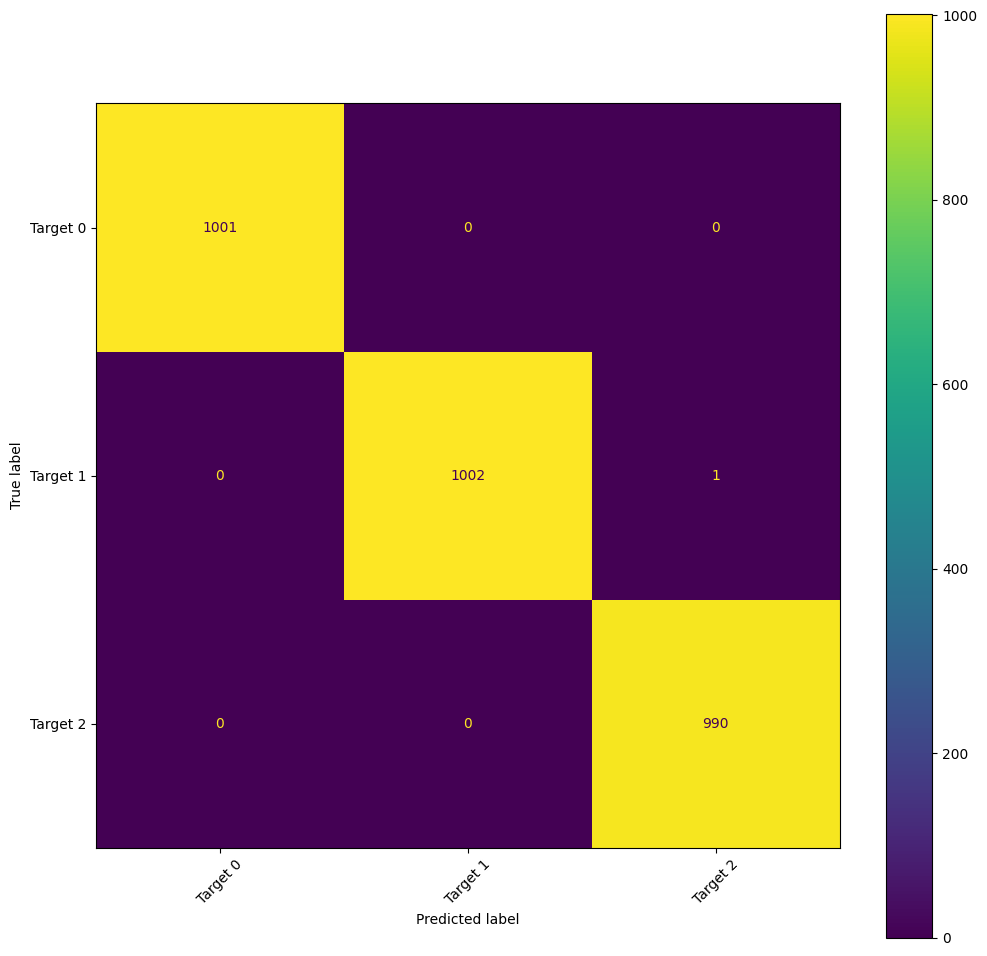

In [21]:
# -- Confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label=np.array(["Target 0","Target 1","Target 2"])

cmo = ConfusionMatrixDisplay(cm,display_labels=label)
fig, ax = plt.subplots(figsize=(12,12))
cmo.plot(ax=ax, xticks_rotation=45)

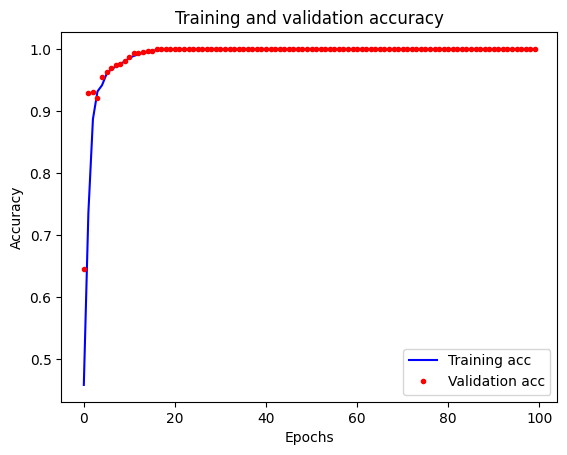

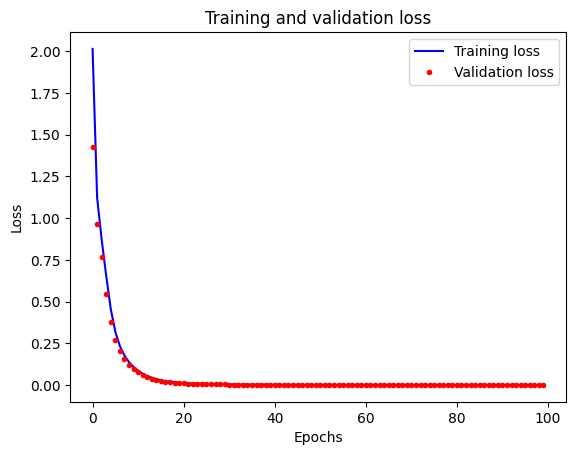

In [22]:
# Plot training and validation accurry and loss graphs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

np.save('historydata.npy',[acc,val_acc,loss,val_loss])
[acc, val_acc, loss, val_loss] = np.load('historydata.npy')

plt.figure()
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 αποκλεισμός ύποπτης κυκλοφορίας

In [23]:
blocked_indices = np.where(pred_y > 1)[0]
if len(blocked_indices) > 0:
    print(f"Blocking {len(blocked_indices)} malicious traffic instances.")


Blocking 991 malicious traffic instances.


In [29]:
target_0 = np.where(pred_y == 0)[0]
if len(target_0) > 0:
    print(f"Traffic instances with tagret 0 are {len(target_0)}.")

target_1 = np.where(pred_y == 1)[0]
if len(target_1) > 0:
    print(f"Traffic instances with tagret 1 are {len(target_1)}.")

target_2 = np.where(pred_y == 2)[0]
if len(target_2) > 0:
    print(f"Traffic instances with tagret 2 are {len(target_2)}.")

Traffic instances with tagret 0 are 1001.
Traffic instances with tagret 1 are 1002.
Traffic instances with tagret 2 are 991.
